In [ ]:
import numpy as np
import random
from tensorflow.keras.datasets import mnist

# Activation function
def relu(matrix):
    return [[max(0, val) for val in row] for row in matrix]

# Max pooling function
def max_pool(matrix, pool_size):
    rows = len(matrix)
    cols = len(matrix[0])
    pooled_rows = rows // pool_size
    pooled_cols = cols // pool_size
    pooled_matrix = []

    for i in range(pooled_rows):
        row = []
        for j in range(pooled_cols):
            block = [matrix[x][y] for x in range(i * pool_size, (i + 1) * pool_size)
                     for y in range(j * pool_size, (j + 1) * pool_size)]
            row.append(max(block))
        pooled_matrix.append(row)

    return pooled_matrix

# Create a random feature matrix for testing
def create_feature_matrix(rows, cols):
    feature_matrix = [[random.randint(0, 100) for _ in range(cols)] for _ in range(rows)]
    return feature_matrix

# Create a random filter matrix
def create_filter_matrix(rows, cols):
    filter_matrix = [[random.randint(0, 100) for _ in range(cols)] for _ in range(rows)]
    return filter_matrix

# Apply convolution filter
def apply_filter(feature_matrix, filter_matrix, padding=0, stride=1):
    # Apply padding to the feature matrix
    feature_matrix = np.pad(feature_matrix, ((padding, padding), (padding, padding)), mode='constant').tolist()
    output_rows = (len(feature_matrix) - len(filter_matrix)) // stride + 1
    output_cols = (len(feature_matrix[0]) - len(filter_matrix[0])) // stride + 1
    output_matrix = []

    for i in range(0, output_rows, stride):
        row = []
        for j in range(0, output_cols, stride):
            value = 0
            for k in range(len(filter_matrix)):
                for l in range(len(filter_matrix[0])):
                    value += feature_matrix[i + k][j + l] * filter_matrix[k][l]
            row.append(value)
        output_matrix.append(row)

    # Apply ReLU
    output_matrix = relu(output_matrix)
    return output_matrix

# Main function to load MNIST, apply convolution, and max-pooling
def main():
    # Load MNIST dataset
    (x_train, _), (_, _) = mnist.load_data()
    # Select a sample image (28x28)
    image = x_train[0]
    print("Original MNIST Image:")
    for row in image:
        print(row)

    # Convert image to list of lists for compatibility with custom functions
    feature_matrix = image.tolist()

    # Define filter matrix
    filter_rows, filter_cols = 3, 3  # Typical 3x3 filter
    filter_matrix = create_filter_matrix(filter_rows, filter_cols)

    # Parameters
    padding = 0
    stride = 1
    pool_size = 2

    # Apply convolution
    output_matrix = apply_filter(feature_matrix, filter_matrix, padding, stride)
    print("\nOutput Matrix after ReLU:")
    for row in output_matrix:
        print(row)

    # Apply max pooling
    pooled_matrix = max_pool(output_matrix, pool_size)
    print("\nPooled Matrix after Max Pooling:")
    for row in pooled_matrix:
        print(row)

if __name__ == "__main__":
    main()


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

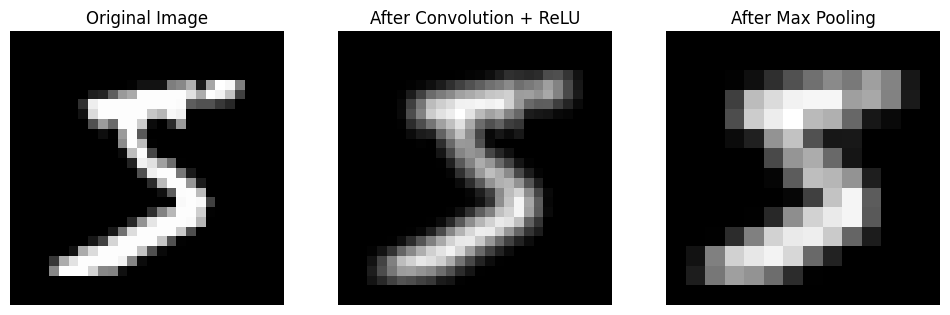

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Activation function
def relu(matrix):
    return [[max(0, val) for val in row] for row in matrix]

# Max pooling function
def max_pool(matrix, pool_size):
    rows = len(matrix)
    cols = len(matrix[0])
    pooled_rows = rows // pool_size
    pooled_cols = cols // pool_size
    pooled_matrix = []

    for i in range(pooled_rows):
        row = []
        for j in range(pooled_cols):
            block = [matrix[x][y] for x in range(i * pool_size, (i + 1) * pool_size)
                     for y in range(j * pool_size, (j + 1) * pool_size)]
            row.append(max(block))
        pooled_matrix.append(row)

    return pooled_matrix

# Create a random filter matrix
def create_filter_matrix(rows, cols):
    filter_matrix = [[random.randint(0, 100) for _ in range(cols)] for _ in range(rows)]
    return filter_matrix

# Apply convolution filter
def apply_filter(feature_matrix, filter_matrix, padding=0, stride=1):
    # Apply padding to the feature matrix
    feature_matrix = np.pad(feature_matrix, ((padding, padding), (padding, padding)), mode='constant').tolist()
    output_rows = (len(feature_matrix) - len(filter_matrix)) // stride + 1
    output_cols = (len(feature_matrix[0]) - len(filter_matrix[0])) // stride + 1
    output_matrix = []

    for i in range(0, output_rows, stride):
        row = []
        for j in range(0, output_cols, stride):
            value = 0
            for k in range(len(filter_matrix)):
                for l in range(len(filter_matrix[0])):
                    value += feature_matrix[i + k][j + l] * filter_matrix[k][l]
            row.append(value)
        output_matrix.append(row)

    # Apply ReLU
    output_matrix = relu(output_matrix)
    return output_matrix

# Main function to load MNIST, apply convolution, and max-pooling
def main():
    # Load MNIST dataset
    (x_train, _), (_, _) = mnist.load_data()
    # Select a sample image (28x28)
    image = x_train[0]

    # Convert image to list of lists for compatibility with custom functions
    feature_matrix = image.tolist()

    # Define filter matrix
    filter_rows, filter_cols = 3, 3  # Typical 3x3 filter
    filter_matrix = create_filter_matrix(filter_rows, filter_cols)

    # Parameters
    padding = 1
    stride = 1
    pool_size = 2

    # Apply convolution
    output_matrix = apply_filter(feature_matrix, filter_matrix, padding, stride)

    # Apply max pooling
    pooled_matrix = max_pool(output_matrix, pool_size)

    # Convert matrices back to numpy arrays for visualization
    original_image = np.array(feature_matrix)
    output_image = np.array(output_matrix)
    pooled_image = np.array(pooled_matrix)

    # Plot the images
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("After Convolution + ReLU")
    plt.imshow(output_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("After Max Pooling")
    plt.imshow(pooled_image, cmap='gray')
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()
